In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read data from csv file

df = pd.read_csv("C:\\Users\\91982\\Desktop\\Projects\\LIFE EXPECTANCY PREDICTION FOR POST THORACIC SURGERY - AI\\thoracic+surgery+data\\Thoracic_surgery_survival_prediction\\Data Preprocessing\\thoracic_surgery.csv")

In [3]:
df.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_In_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [4]:
df.describe()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_In_1yr
count,454.000000,454.000000,454.00000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,3.092511,3.287952,2.51685,0.795154,0.059471,0.136564,0.055066,0.696035,0.171806,1.733480,0.074890,0.004405,0.017621,0.828194,0.004405,62.777533,0.151982
std,0.715817,0.872347,0.77189,0.531459,0.236766,0.343765,0.228361,0.460475,0.377628,0.707499,0.263504,0.066299,0.131715,0.377628,0.066299,8.449634,0.359400
min,1.000000,1.440000,0.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000
25%,3.000000,2.600000,1.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.000000,3.160000,2.36000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.000000,3.840000,2.97750,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,8.000000,6.300000,5.48000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [5]:
live = df[df['Death_In_1yr'] == 0]
death = df[df['Death_In_1yr'] == 1]

condition = ['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',
             'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']

l = [np.mean(live[c]) for c in condition]
d = [np.mean(death[c]) for c in condition]

ld = pd.DataFrame(
    data={'Attribute': condition, 'Live 1yr Mean': l, 'Death 1yr Mean': d})
ld = ld.set_index('Attribute')

print('Death: {:d}, Live: {:d}'.format(len(death), len(live)))
print("1 year death: {:.2f}% out of 454 patients".format(
    np.mean(df.Death_In_1yr)*100))


ld

Death: 69, Live: 385
1 year death: 15.20% out of 454 patients


,Live 1yr Mean,Death 1yr Mean
Attribute,,
FVC,3.304597,3.195072
FEV1,2.540805,2.383188
Performance,0.774026,0.913043
Pain,0.051948,0.101449
Haemoptysis,0.124675,0.202899
Dyspnoea,0.044156,0.115942
Cough,0.677922,0.797101
Weakness,0.158442,0.246377
Tumor_Size,1.683117,2.014493


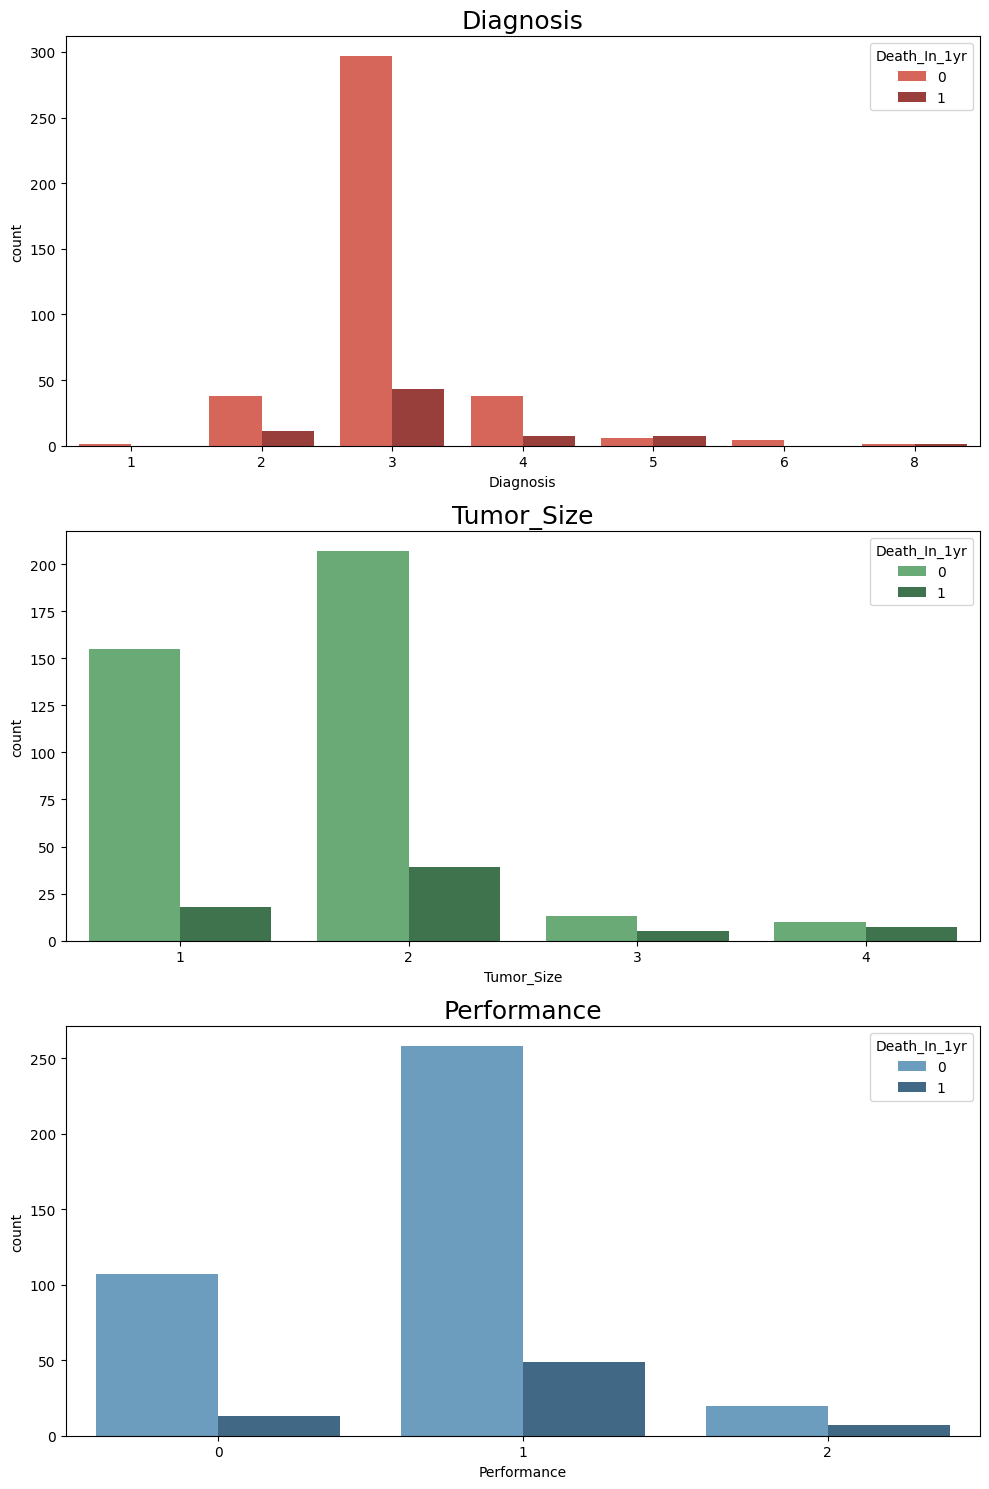

In [6]:
#Count plots of Diagnosis, Tumor_Size, Performance with difference of live and death data

fig, axes = plt.subplots(3,1,figsize=(10,15))

sns.countplot(x='Diagnosis', hue='Death_In_1yr', data=df, palette='Reds_d', ax=axes[0]).set_title('Diagnosis', fontsize=18)
sns.countplot(x='Tumor_Size', hue='Death_In_1yr', data=df, palette='Greens_d', ax=axes[1]).set_title('Tumor_Size', fontsize=18)
sns.countplot(x='Performance', hue='Death_In_1yr', data=df, palette='Blues_d', ax=axes[2]).set_title('Performance', fontsize=18)

plt.tight_layout()

In [7]:

# Correlation coefficients for FVC and FEV1
np.corrcoef(df.FVC, df.FEV1)[0, 1]

0.8875452733829001

In [8]:

# Correlation coefficients for Age and FVC
np.corrcoef(df.Age, df.FVC)[0, 1]

-0.2994299196604911

In [9]:

# Correlation coefficients for Age and FEV1
np.corrcoef(df.Age, df.FEV1)[0, 1]

-0.30961662730798917

In [10]:
df.corr()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_In_1yr
Diagnosis,1.000000,0.106642,0.100170,-0.042919,0.006541,-0.078367,-0.031233,-0.081930,-0.018096,-0.134280,0.033409,-0.008606,-0.017328,-0.096235,-0.008606,0.090274,0.073938
FVC,0.106642,1.000000,0.887545,-0.102612,0.001981,-0.103742,0.070158,-0.066180,-0.105544,0.037635,-0.120430,-0.009767,-0.037149,-0.012865,-0.062058,-0.299430,-0.045123
FEV1,0.100170,0.887545,1.000000,-0.138419,0.012140,-0.158771,0.024530,-0.134925,-0.128324,0.014588,-0.111169,-0.034237,-0.032890,-0.054192,-0.079098,-0.309617,-0.073388
Performance,-0.042919,-0.102612,-0.138419,1.000000,0.132116,0.129292,0.093149,0.692147,0.417734,0.101060,0.030971,0.025667,0.020144,0.176232,-0.036983,0.200226,0.094011
Pain,0.006541,0.001981,0.012140,0.132116,1.000000,0.225459,0.061782,-0.056551,-0.065151,0.094831,0.034604,-0.016727,-0.033678,-0.082988,-0.016727,0.057386,0.075141
Haemoptysis,-0.078367,-0.103742,-0.158771,0.129292,0.225459,1.000000,0.100836,0.067577,0.073938,0.050140,0.008696,-0.026454,0.092996,-0.022923,-0.026454,0.083440,0.081781
Dyspnoea,-0.031233,0.070158,0.024530,0.093149,0.061782,0.100836,1.000000,0.075556,-0.058753,0.077375,-0.031999,-0.016058,0.114452,-0.043642,-0.016058,0.001787,0.112979
Cough,-0.081930,-0.066180,-0.134925,0.692147,-0.056551,0.067577,0.075556,1.000000,0.199428,0.150563,0.024284,0.043958,0.015713,0.194116,-0.028350,0.131230,0.093019
Weakness,-0.018096,-0.105544,-0.128324,0.417734,-0.065151,0.073938,-0.058753,0.199428,1.000000,-0.034797,0.070072,0.057875,0.027763,0.114566,-0.030297,0.205717,0.083691
Tumor_Size,-0.134280,0.037635,0.014588,0.101060,0.094831,0.050140,0.077375,0.150563,-0.034797,1.000000,0.036253,-0.021976,-0.020558,0.043060,-0.021976,0.010370,0.168335


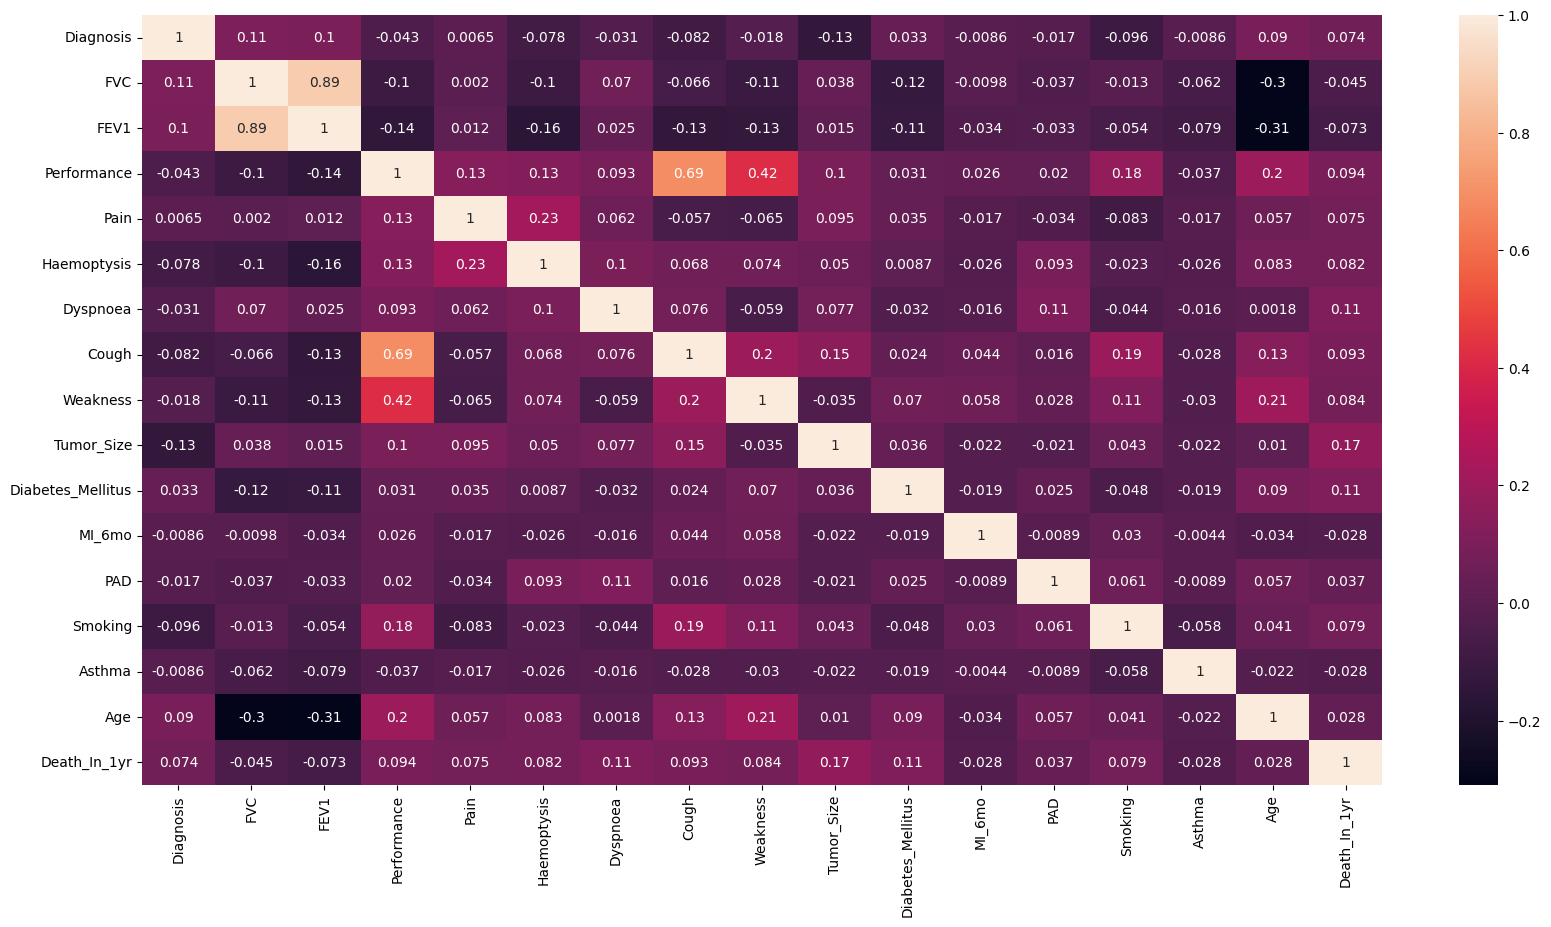

In [11]:
# Use Heat Map to see it well
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [12]:
# Check the Skewness whether bell or gaussian distribution
# neg = left
# positive = right
# closer to 0 is less skew
df.skew()

Diagnosis             2.328751
FVC                   0.536925
FEV1                  0.680378
Performance          -0.154621
Pain                  3.737686
Haemoptysis           2.123800
Dyspnoea              3.914004
Cough                -0.855215
Weakness              1.745877
Tumor_Size            1.069976
Diabetes_Mellitus     3.240871
MI_6mo               15.016437
PAD                   7.356992
Smoking              -1.745877
Asthma               15.016437
Age                   0.042000
Death_In_1yr          1.945229
dtype: float64

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

<h2>Logistic Regration Model creation</h2>

In [14]:
X = df.drop(['Death_In_1yr', 'MI_6mo', 'Asthma'], axis=1)
y = df['Death_In_1yr']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y)


lr_model = LogisticRegression()

lr_model.fit(X_train, Y_train)

c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
y_pred = lr_model.predict(X_test)
y_pred = y_pred.round().flatten()

In [17]:
cnf_matrix = confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[115,   1],
       [ 21,   0]], dtype=int64)

In [18]:
nor_cnf = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
print("Normalized confusion matrix")
print(nor_cnf)

Normalized confusion matrix
[[0.99137931 0.00862069]
 [1.         0.        ]]


In [19]:
classes = ['live', 'death']
print(classification_report(Y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

        live       0.85      0.99      0.91       116
       death       0.00      0.00      0.00        21

    accuracy                           0.84       137
   macro avg       0.42      0.50      0.46       137
weighted avg       0.72      0.84      0.77       137



Text(0.5, 0, 'Predicted label')

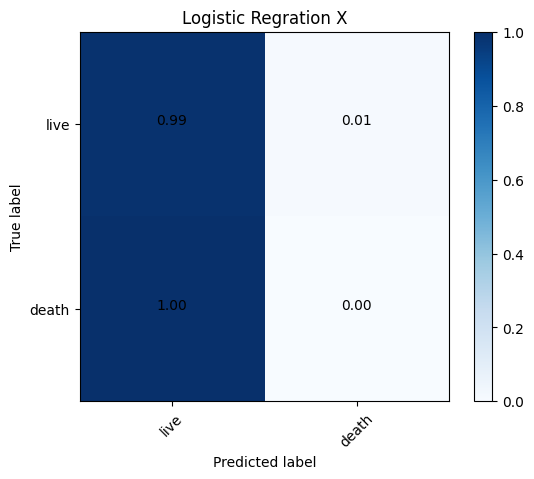

In [20]:


plt.imshow(nor_cnf, interpolation='nearest', cmap=plt.cm.Blues)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, '{:.2f}'.format(
            nor_cnf[i, j]), horizontalalignment="center", color="black")


plt.title('Logistic Regration X')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')

<h3>By analysing the confusion matrix we conclude that over model is overfited so we need feature scaling and regularization to overcome this error</h3>

<h2>Logistic Regration Model creation with Regularization,SMOTE and feature sacling </h2>

In [53]:
X = df.drop(['MI_6mo', 'Death_In_1yr',  'Asthma'], axis=1)
y = df['Death_In_1yr']



In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=4, stratify=y)


smote = SMOTE(random_state=4)


x_train_resamp, y_train_resamp = smote.fit_resample(X_train, Y_train)



In [55]:
# logistic regression model with regularization
lr_model = LogisticRegression(penalty='l2', C=1.0, random_state=4,class_weight='balanced')
# Example: StandardScaler for scaling features
preprocessing = [('scaler', StandardScaler())]

# preprocessor pipeline
preprocessor = Pipeline(steps=preprocessing)

# Combine preprocessing steps with the model in a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', lr_model)])

In [56]:
model.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', random_state=4))])

In [57]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.6277372262773723
Precision: 0.21153846153846154
Recall: 0.5238095238095238
F1 Score: 0.3013698630136986
ROC AUC Score: 0.5851806239737274


In [58]:
cnf_matrix = confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[75, 41],
       [10, 11]], dtype=int64)

In [59]:
nor_cnf = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
print("Normalized confusion matrix")
print(nor_cnf)

Normalized confusion matrix
[[0.64655172 0.35344828]
 [0.47619048 0.52380952]]


In [60]:
classes = ['live', 'death']
print(classification_report(Y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

        live       0.88      0.65      0.75       116
       death       0.21      0.52      0.30        21

    accuracy                           0.63       137
   macro avg       0.55      0.59      0.52       137
weighted avg       0.78      0.63      0.68       137



Text(0.5, 0, 'Predicted label')

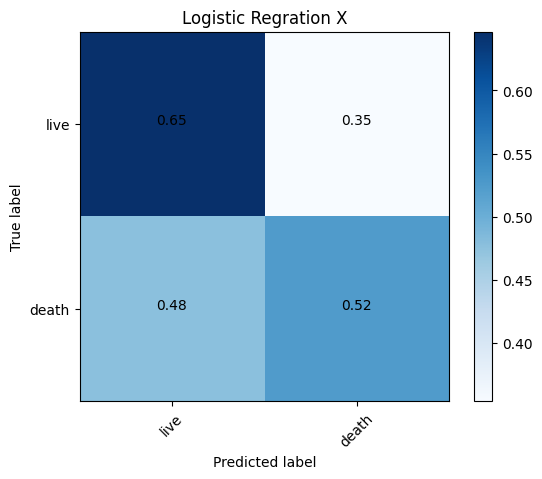

In [61]:


plt.imshow(nor_cnf, interpolation='nearest', cmap=plt.cm.Blues)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, '{:.2f}'.format(
            nor_cnf[i, j]), horizontalalignment="center", color="black")


plt.title('Logistic Regration X')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [62]:
from joblib import dump
dump(model, 'logisticregration_model.joblib')

['logisticregration_model.joblib']

<h1>Random Forest Classification</h1>

In [31]:
from sklearn.ensemble import RandomForestClassifier

<h2>Hypothisis  Testing</h2>


In [32]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    permuted_data = np.random.permutation(np.concatenate((data1, data2)))
    return permuted_data[:len(data1)], permuted_data[len(data1):]


def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates


def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    return np.mean(data_1) - np.mean(data_2)

In [33]:
# Hypothesis testing with Permutations of data
condition = ['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',
             'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']

p_values = []
for c in condition:
    empirical_diff_means = diff_of_means(death[c], live[c])
    perm_replicates = draw_perm_reps(
        death[c], live[c], diff_of_means, size=10000)
    p = np.sum(perm_replicates >= empirical_diff_means if empirical_diff_means >
               0 else perm_replicates <= empirical_diff_means) / len(perm_replicates)
    p_values.append(p)

print(list(zip(condition, p_values)))

[('FVC', 0.1765), ('FEV1', 0.0606), ('Performance', 0.0276), ('Pain', 0.0991), ('Haemoptysis', 0.0627), ('Dyspnoea', 0.0236), ('Cough', 0.0294), ('Weakness', 0.0583), ('Tumor_Size', 0.0002), ('Diabetes_Mellitus', 0.0209), ('MI_6mo', 0.7129), ('PAD', 0.3507), ('Smoking', 0.0613), ('Asthma', 0.7163), ('Age', 0.2817)]


In [34]:
X = df[['Performance', 'Dyspnoea', 'Cough', 'Tumor_Size', 'Diabetes_Mellitus']]
y = df['Death_In_1yr']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1111, stratify=y)
rfc_model = RandomForestClassifier(class_weight='balanced', random_state=1111)
rfc_model.fit(X_train,Y_train)

RandomForestClassifier(class_weight='balanced', random_state=1111)

In [36]:
y_pred = rfc_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5255474452554745
Precision: 0.06
Recall: 0.14285714285714285
F1 Score: 0.08450704225352113
ROC AUC Score: 0.3688423645320197


In [37]:
# Confusion Matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(cnf_matrix)

Confusion Matrix:
[[69 47]
 [18  3]]


In [38]:
# Normalized Confusion Matrix
nor_cnf = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
print("Normalized Confusion Matrix:")
print(nor_cnf)

Normalized Confusion Matrix:
[[0.59482759 0.40517241]
 [0.85714286 0.14285714]]


In [39]:
# Classification Report
classes = ['live', 'death']
print("Classification Report:")
print(classification_report(Y_test, y_pred, target_names=classes))

Classification Report:
              precision    recall  f1-score   support

        live       0.79      0.59      0.68       116
       death       0.06      0.14      0.08        21

    accuracy                           0.53       137
   macro avg       0.43      0.37      0.38       137
weighted avg       0.68      0.53      0.59       137



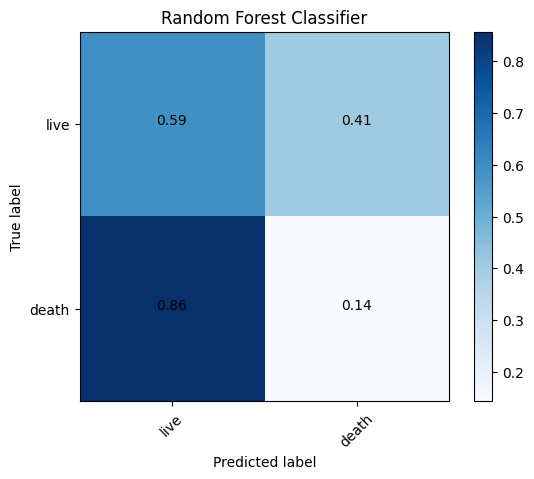

In [40]:
# Plotting Confusion Matrix
plt.imshow(nor_cnf, interpolation='nearest', cmap=plt.cm.Blues)
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, '{:.2f}'.format(
            nor_cnf[i, j]), horizontalalignment="center", color="black")
plt.title('Random Forest Classifier')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [41]:
from joblib import dump
dump(model, 'rendomforest_model.joblib')

['rendomforest_model.joblib']

<h1>Model testing</h1>

In [ ]:
import pandas as pd
from joblib import load

# Load the trained model
model = load("C:\\Users\\91982\\Desktop\\Projects\\LIFE EXPECTANCY PREDICTION FOR POST THORACIC SURGERY - AI\\thoracic+surgery+data\\logisticregration_model.joblib")

# Prepare input data
original_data = {
    'Diagnosis': 3,
    'FVC': 3.8,
    'FEV1': 2.8,
    'Performance': 0,
    'Pain': 0,
    'Haemoptysis': 0,
    'Dyspnoea': 0,
    'Cough': 0,
    'Weakness': 0,
    'Tumor_Size': 4,
    'Diabetes_Mellitus': 0,
    'PAD': 0,
    'Smoking': 0,
    'Age': 60
}

# 'Diagnosis': 1,
#     'FVC': 0,
#     'FEV1': 0,
#     'Performance': 0,
#     'Pain': 1,
#     'Haemoptysis': 1,
#     'Dyspnoea': 1,
#     'Cough': 1,
#     'Weakness': 1,
#     'Tumor_Size': 0,
#     'Diabetes_Mellitus': 1,
#     'PAD': 1,
#     'Smoking': 1,
#     'Age': 30

# Create a DataFrame from the input data
input_df = pd.DataFrame([original_data])

# Make predictions
predictions = model.predict(input_df)

# Map predicted labels to 'live' or 'death'
predicted_class = ['live' if pred == 0 else 'death' for pred in predictions]

# Print predictions
print("Predicted class for the input data:", predicted_class)